In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
x=data.iloc[:,[3,4]].values

In [12]:
from sklearn.cluster import KMeans

In [ ]:
#Using the Elbow to firn out optimum no of custmers
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [16]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

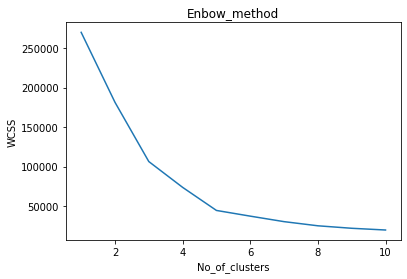

In [17]:
#3Elbow curve plot
plt.plot(range(1,11),wcss)
plt.title("Enbow_method")
plt.xlabel("No_of_clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
#fir the k_means modl on the data
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [21]:
#prediction
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


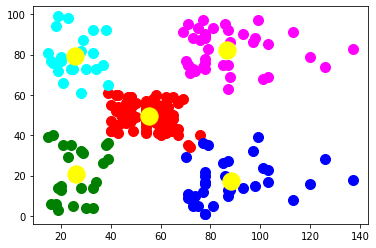

In [23]:
#visualization the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans==0,1],s=100,c="red",label="cluster_1")
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans==1,1],s=100,c="blue",label="cluster_2")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans==2,1],s=100,c="green",label="cluster_3")
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans==3,1],s=100,c="cyan",label="cluster_4")
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans==4,1],s=100,c="magenta",label="cluster_5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Centroid")